In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import copy

In [32]:
# Read in data

raw_data_memory = pd.read_csv('../data/319_memory_data.csv')
raw_data_319 = pd.read_csv('../data/319_map_data.csv')
raw_data_320 = pd.read_csv('../data/320_map_data.csv')

# For now, only consider non-sacred lifeforce drops from T16 maps
data_memory = raw_data_memory[raw_data_memory["sacred drops"] == 0]
data_memory = data_memory[data_memory["amount"] != 0]

data_319 = raw_data_319[raw_data_319.type_y != "sacred"]
data_319 = data_319[data_319.level == 83]
data_319 = data_319[data_319.amount != 0]

data_320 = raw_data_320[raw_data_320.type_y != "sacred"]
data_320 = data_320[data_320.level == 83]
data_320 = data_320[data_320.amount != 0]

combined_data = pd.concat([data_319, data_320, data_memory])
combined_map_data = pd.concat([data_319, data_320])

plot_data_319 = pd.read_csv('../data/319_plot_data.csv')
plot_data_320 = pd.read_csv('../data/320_plot_data.csv')
combined_plot_data = pd.concat([plot_data_319, plot_data_320])



 # Lifeforce Drop Amount and Scaling

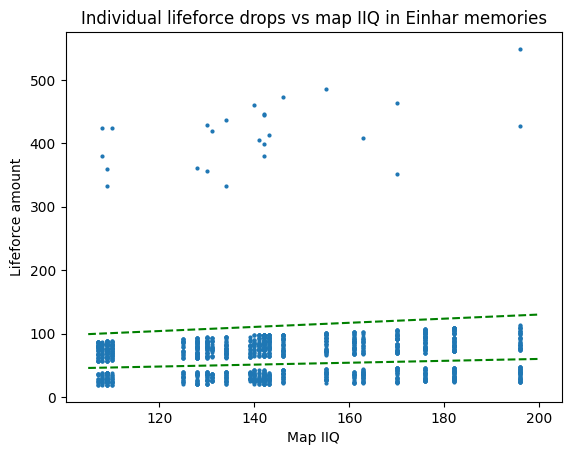

In [33]:
plt.figure()
plt.scatter(data_memory.quantity, data_memory.amount, s=4)
quantity_values = np.linspace(105, 200, 100)
separation_line_1 = 30 * (1 + quantity_values/200)
separation_line_2 = 65 * (1 + quantity_values/200)
plt.plot(quantity_values, separation_line_1, linestyle="--", c='g')
plt.plot(quantity_values, separation_line_2, linestyle="--", c='g')
plt.xlabel("Map IIQ")
plt.ylabel("Lifeforce amount")
plt.title("Individual lifeforce drops vs map IIQ in Einhar memories")
plt.show()

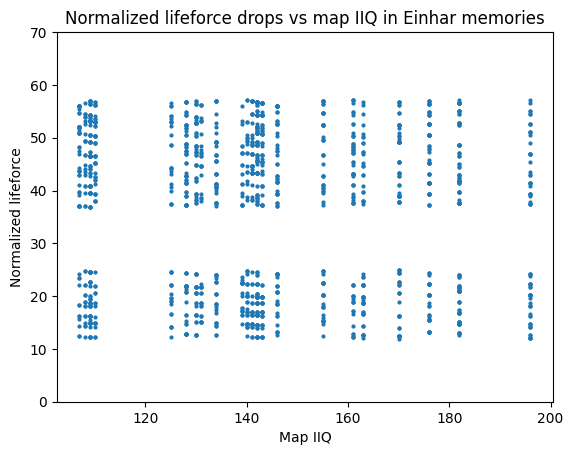

In [34]:
plt.figure()
plt.scatter(data_memory.quantity, data_memory.normalized, s=4)
plt.ylim(bottom=0, top=70)
plt.xlabel("Map IIQ")
plt.ylabel("Normalized lifeforce")
plt.title("Normalized lifeforce drops vs map IIQ in Einhar memories")
plt.show()


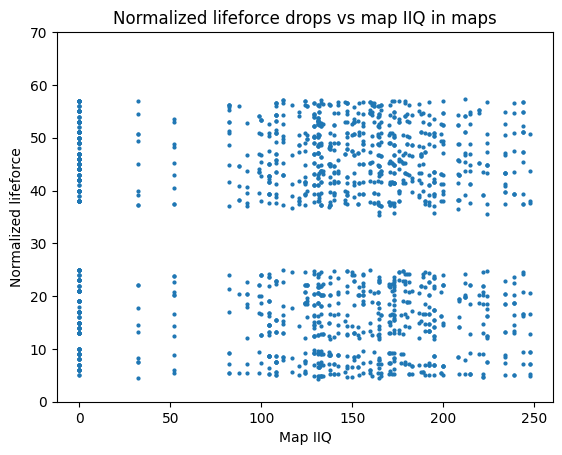

In [35]:
plt.figure()
plt.scatter(data_319.quantity, data_319.normalized, s=4)
plt.xlabel("Map IIQ")
plt.ylabel("Normalized lifeforce")
plt.title("Normalized lifeforce drops vs map IIQ in maps")
plt.ylim(bottom=0, top=70)
plt.show()


# Base (Normalized) Lifeforce Distribution

Even T2 drops:
16
Odd T2 drops:
65


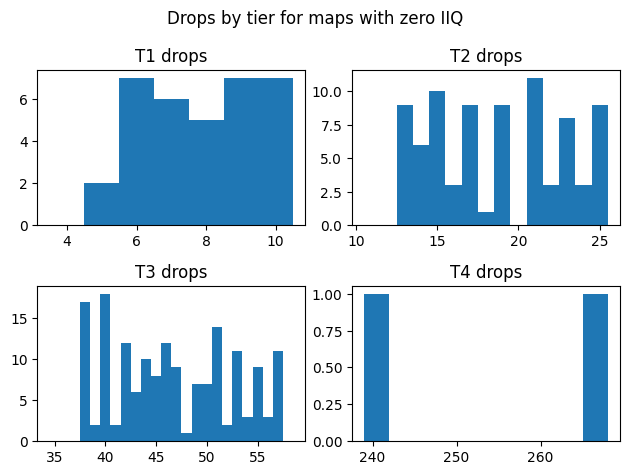

In [36]:
data_zero_quant = data_319[data_319.quantity == 0]

t1_drops = data_zero_quant[(data_zero_quant.normalized < 10.5)].normalized
t2_drops = data_zero_quant[(data_zero_quant.normalized > 10.5) & (data_zero_quant.normalized < 30)].normalized
t3_drops = data_zero_quant[(data_zero_quant.normalized > 30) & (data_zero_quant.normalized < 60)].normalized
t4_drops = data_zero_quant[(data_zero_quant.normalized > 60)].normalized
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(t1_drops, bins=np.arange(3.5, 11.0, 1.0))
axs[0,0].set_title("T1 drops")
axs[0,1].hist(t2_drops, bins=np.arange(10.5, 26.0, 1.0))
axs[0,1].set_title("T2 drops")
axs[1,0].hist(t3_drops, bins=np.arange(34.5, 59.0, 1.0))
axs[1,0].set_title("T3 drops")
axs[1,1].hist(t4_drops)
axs[1,1].set_title("T4 drops")
fig.suptitle("Drops by tier for maps with zero IIQ")
fig.tight_layout()

print("Even T2 drops:")
print(sum([1 for x in t2_drops if x % 2 == 0]))
print("Odd T2 drops:")
print(sum([1 for x in t2_drops if x % 2 == 1]))


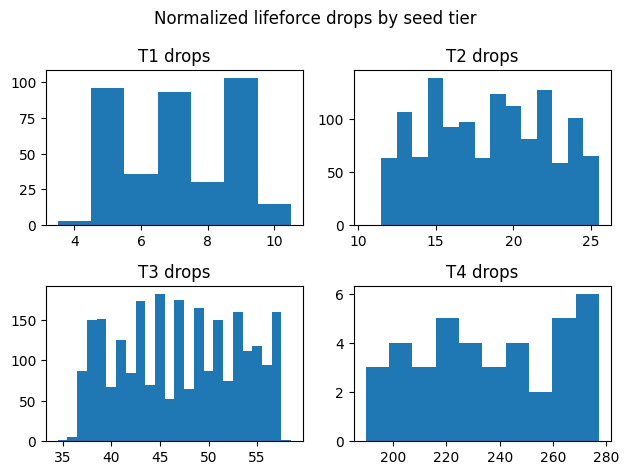

In [37]:
t1_drops = combined_data[(combined_data.normalized < 10.5)].normalized
t2_drops = combined_data[(combined_data.normalized > 10.5) & (combined_data.normalized < 30)].normalized
t3_drops = combined_data[(combined_data.normalized > 30) & (combined_data.normalized < 60)].normalized
t4_drops = combined_data[(combined_data.normalized > 60)].normalized
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(t1_drops, bins=np.arange(3.5, 11.0, 1.0))
axs[0,0].set_title("T1 drops")
axs[0,1].hist(t2_drops, bins=np.arange(10.5, 26.0, 1.0))
axs[0,1].set_title("T2 drops")
axs[1,0].hist(t3_drops, bins=np.arange(34.5, 59.0, 1.0))
axs[1,0].set_title("T3 drops")
axs[1,1].hist(t4_drops)
axs[1,1].set_title("T4 drops")
fig.suptitle("Normalized lifeforce drops by seed tier")
fig.tight_layout()



In [38]:
# Statistics for normalized drops
print("T1 drops:")
print("Range: {} to {}".format(t1_drops.min(), t1_drops.max()))
print("Mean: {} +/- {}".format(t1_drops.mean(), scipy.stats.sem(t1_drops) * 1.96))
print("Variance: {}".format(t1_drops.var()))

print("\nUniform random variable from 4.5 to 10.0:")
print("Range: 4.5 to 10.0")
print("Mean: {}".format((4.5+10.0)/2))
print("Variance: {}".format((4.5-10)**2/12))

print("\nT2 drops:")
print("Range: {} to {}".format(t2_drops.min(), t2_drops.max()))
print("Mean: {} +/- {}".format(t2_drops.mean(), scipy.stats.sem(t2_drops) * 1.96))
print("Variance: {}".format(t2_drops.var()))

print("\nUniform random variable from 12.0 to 25.0:")
print("Range: 12.0 to 25.0")
print("Mean: {}".format((12.0+25.0)/2))
print("Variance: {}".format((12.0-25)**2/12))

print("\nT3 drops:")
print("Range: {} to {}".format(t3_drops.min(), t3_drops.max()))
print("Mean: {} +/- {}".format(t3_drops.mean(), scipy.stats.sem(t3_drops) * 1.96))
print("Variance: {}".format(t3_drops.var()))
print("Note: only {} out of {} drops lie outside of the range 36.8 to 57.2".format(t3_drops[t3_drops < 36.8].count() + t3_drops[t3_drops > 57.2].count(), t3_drops.count()))

print("\nUniform random variable from 37 to 57:")
print("Range: 37 to 57")
print("Mean: {}".format((37+57)/2))
print("Variance: {}".format((37-57)**2/12))

print("\nT4 drops:")
print("Range: {} to {}".format(t4_drops.min(), t4_drops.max()))
print("Mean: {} +/- {}".format(t4_drops.mean(), scipy.stats.sem(t4_drops) * 1.96))
print("Variance: {}".format(t4_drops.var()))

print("\nUniform random variable from 190 to 280:")
print("Range: 190 to 280")
print("Mean: {}".format((190+280)/2))
print("Variance: {}".format((190-280)**2/12))



T1 drops:
Range: 4.229607250755287 to 10.0
Mean: 7.1589538771148815 +/- 0.1640162648767201
Variance: 2.6329919861998947

Uniform random variable from 4.5 to 10.0:
Range: 4.5 to 10.0
Mean: 7.25
Variance: 2.5208333333333335

T2 drops:
Range: 11.793611793611792 to 25.0
Mean: 18.447141323883052 +/- 0.20658362499559135
Variance: 14.386309969969085

Uniform random variable from 12.0 to 25.0:
Range: 12.0 to 25.0
Mean: 18.5
Variance: 14.083333333333334

T3 drops:
Range: 35.38083538083538 to 57.5
Mean: 47.11240303597891 +/- 0.23849657045492909
Variance: 37.016226389240785
Note: only 14 out of 2500 drops lie outside of the range 36.8 to 57.2

Uniform random variable from 37 to 57:
Range: 37 to 57
Mean: 47.0
Variance: 33.333333333333336

T4 drops:
Range: 189.7297297297297 to 277.27272727272725
Mean: 235.8987520266101 +/- 8.584348130116139
Variance: 748.1128383855972

Uniform random variable from 190 to 280:
Range: 190 to 280
Mean: 235.0
Variance: 675.0


# Pack Size Scaling

In [39]:
def get_plot_ratios(dataset):
    """
    Creates a new dataframe with the numbers of dropped lifeforce stacks and number of seeds for each tier and plot
    From this, it is simple to calculate the ratio of stacks to seeds
    Also includes other possibly relevant atlas passives and map statistics
    :param dataset: The input dataframe
    :return: The output dataframe with dropped stacks and number of seeds
    """
    ratios = []
    for plot in dataset["plot"].unique():
        if "type_y" in dataset:
            # not a memory
            filtered_drops = dataset[(dataset["plot"] == plot) & (dataset["type_y"] != "sacred")]
        else:
            # an Einhar memory
            filtered_drops = dataset[(dataset["plot"] == plot) & (dataset["amount"] > 0)]
        for lf_type in filtered_drops["type"].unique():
            lifeforce_drops = filtered_drops[filtered_drops["type"] == lf_type].normalized
            first_row = filtered_drops[(filtered_drops["plot"] == plot)&(filtered_drops["type"] == lf_type)].iloc[0]
            drop_tiers = [0 for _ in range(4)]
            for drop in lifeforce_drops:
                if drop > 100:
                    drop_tiers[3] += 1
                elif drop > 30:
                    drop_tiers[2] += 1
                elif drop > 11:
                    drop_tiers[1] += 1
                elif drop > 0:
                    drop_tiers[0] += 1
            plot_dict = {
                "quantity": first_row.quantity,
                "pack_size": first_row.pack_size,
                "delirium": first_row.delirium,
                "harvest_additional_monster": first_row.get("harvest_additional_monster", 0),
                "harvest_duplicate_lifeforce": first_row.get("harvest_duplicate_lifeforce", 0),
                "harvest_duplicate_monsters": first_row.get("harvest_duplicate_monsters", 0),
                "harvest_increased_t3": first_row.get("harvest_increased_t3", 0),
                "harvest_t4_wilt": first_row.get("harvest_t4_wilt", False),
                "map_seed": first_row.map_seed,
                "plot": plot,
                "level": first_row.get("level", 83),
                "type": lf_type
            }
            # Note: Harvest monster duplication passives did not work when data was collected for 3.20
                
            for tier in range(1, 5):
                tier_amount = first_row[f"t{tier}"]
                tier_dict = copy.copy(plot_dict)
                tier_dict["tier"] = tier
                tier_dict["base_amount"] = round(tier_amount)
                tier_dict["num_drops"] = drop_tiers[tier-1]
                ratios.append(tier_dict)
    ratios = pd.DataFrame(ratios)
    ratios["ratio"] = ratios["num_drops"] / ratios["base_amount"]
    return pd.DataFrame(ratios)


ratios_319 = get_plot_ratios(data_319)
ratios_320 = get_plot_ratios(data_320)
ratios_einhar = get_plot_ratios(data_memory)
all_ratios = pd.concat([ratios_319, ratios_320, ratios_einhar])


Best fit: 
Drops = nan * pack_size + nan


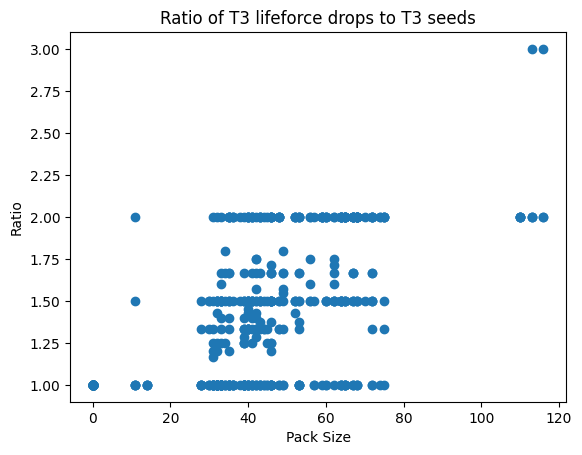

In [40]:
# Tier 3 drops with no harvest additional monster

selected_ratios = all_ratios[all_ratios["tier"] == 3]
selected_ratios = selected_ratios[selected_ratios["harvest_additional_monster"] == 0.0]

pack_sizes = selected_ratios["pack_size"]
ratios = selected_ratios["ratio"]
regression = scipy.stats.linregress(pack_sizes, ratios)
print("Best fit: ")
print("Drops = {:.5f} * pack_size + {:.5f}".format(regression.slope, regression.intercept))
packsize_range = np.linspace(np.min(pack_sizes), np.max(pack_sizes), 21)

plt.title("Ratio of T3 lifeforce drops to T3 seeds")
plt.xlabel("Pack Size")
plt.ylabel("Ratio")
plt.scatter(selected_ratios["pack_size"], selected_ratios["ratio"])
plt.plot(packsize_range, regression.slope * packsize_range + regression.intercept, linestyle="--", color="r")
plt.show()
plt.close()

Best fit: 
Drops = nan * pack_size + nan


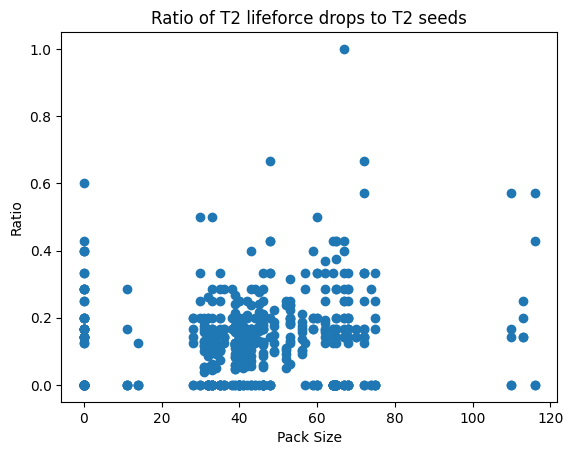

In [41]:
# Tier 2 drops with no harvest additional monster

selected_ratios = all_ratios[all_ratios["tier"] == 2]
selected_ratios = selected_ratios[selected_ratios["harvest_additional_monster"] == 0.0]

pack_sizes = selected_ratios["pack_size"]
ratios = selected_ratios["ratio"]
regression = scipy.stats.linregress(pack_sizes, ratios)
print("Best fit: ")
print("Drops = {:.5f} * pack_size + {:.5f}".format(regression.slope, regression.intercept))
packsize_range = np.linspace(np.min(pack_sizes), np.max(pack_sizes), 21)

plt.title("Ratio of T2 lifeforce drops to T2 seeds")
plt.xlabel("Pack Size")
plt.ylabel("Ratio")
plt.scatter(selected_ratios["pack_size"], selected_ratios["ratio"])
plt.plot(packsize_range, regression.slope * packsize_range + regression.intercept, linestyle="--", color="r")
plt.show()
plt.close()


In [42]:
# Some more numbers for T2 drops

zero_pack_size_ratios = selected_ratios[selected_ratios["pack_size"] == 0.0]
mean_ratio = np.mean(zero_pack_size_ratios["ratio"])
print("Mean of zero pack size ratios: {:.3f}".format(mean_ratio))

normalized_ratios = selected_ratios["ratio"] / (1 + selected_ratios["pack_size"]/100)
mean_normalized_ratio = np.mean(normalized_ratios)
sem_normalized_ratio = scipy.stats.sem(normalized_ratios)
print("Mean normalized ratio: {:.3f} +/- {:.3f}".format(mean_normalized_ratio, sem_normalized_ratio*1.96))

Mean of zero pack size ratios: 0.107
Mean normalized ratio: inf +/- nan


Best fit: 
Drops = nan * pack_size + nan


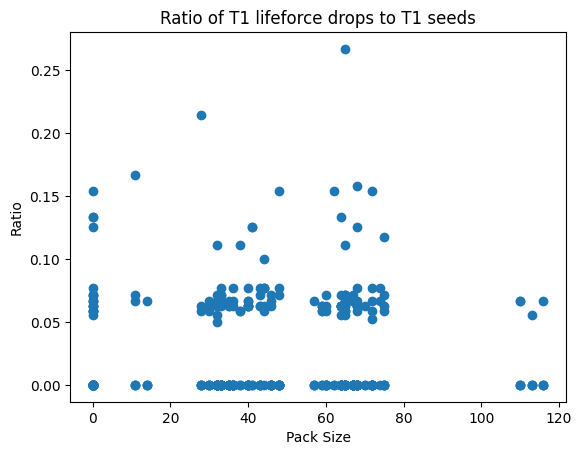

In [43]:
# Tier 1 drops with no harvest additional monster

selected_ratios = all_ratios[all_ratios["tier"] == 1]
selected_ratios = selected_ratios[selected_ratios["harvest_additional_monster"] == 0.0]

pack_sizes = selected_ratios["pack_size"]
ratios = selected_ratios["ratio"]
regression = scipy.stats.linregress(pack_sizes, ratios)
print("Best fit: ")
print("Drops = {:.5f} * pack_size + {:.5f}".format(regression.slope, regression.intercept))
packsize_range = np.linspace(np.min(pack_sizes), np.max(pack_sizes), 21)

plt.title("Ratio of T1 lifeforce drops to T1 seeds")
plt.xlabel("Pack Size")
plt.ylabel("Ratio")
plt.scatter(selected_ratios["pack_size"], selected_ratios["ratio"])
plt.plot(packsize_range, regression.slope * packsize_range + regression.intercept, linestyle="--", color="r")
plt.show()
plt.close()


In [44]:
# Some more numbers for T1 drops

zero_pack_size_ratios = selected_ratios[selected_ratios["pack_size"] == 0.0]
mean_ratio = np.mean(zero_pack_size_ratios["ratio"])
print("Mean of zero pack size ratios: {:.3f}".format(mean_ratio))

normalized_ratios = selected_ratios["ratio"] / (1 + selected_ratios["pack_size"]/100)
mean_normalized_ratio = np.mean(normalized_ratios)
sem_normalized_ratio = scipy.stats.sem(normalized_ratios)
print("Mean normalized ratio: {:.3f} +/- {:.3f}".format(mean_normalized_ratio, sem_normalized_ratio*1.96))


Mean of zero pack size ratios: 0.020
Mean normalized ratio: 0.020 +/- nan


Best fit: 
Drops = nan * pack_size + nan


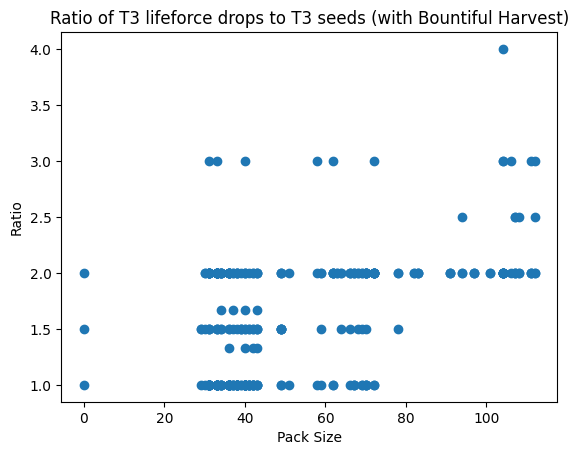

In [45]:
# T3 drops with harvest additional monster

selected_ratios = all_ratios[all_ratios["tier"] == 3]
selected_ratios = selected_ratios[selected_ratios["harvest_additional_monster"] == 10.0]
selected_ratios = selected_ratios[selected_ratios.harvest_duplicate_lifeforce == 0.0]

pack_sizes = selected_ratios["pack_size"]
ratios = selected_ratios["ratio"]
regression = scipy.stats.linregress(pack_sizes, ratios)
print("Best fit: ")
print("Drops = {:.5f} * pack_size + {:.5f}".format(regression.slope, regression.intercept))
packsize_range = np.linspace(np.min(pack_sizes), np.max(pack_sizes), 21)

plt.title("Ratio of T3 lifeforce drops to T3 seeds (with Bountiful Harvest)")
plt.xlabel("Pack Size")
plt.ylabel("Ratio")
plt.scatter(selected_ratios["pack_size"], selected_ratios["ratio"])
plt.plot(packsize_range, regression.slope * packsize_range + regression.intercept, linestyle="--", color="r")
plt.show()
plt.close()



Best fit: 
Drops = nan * pack_size + nan


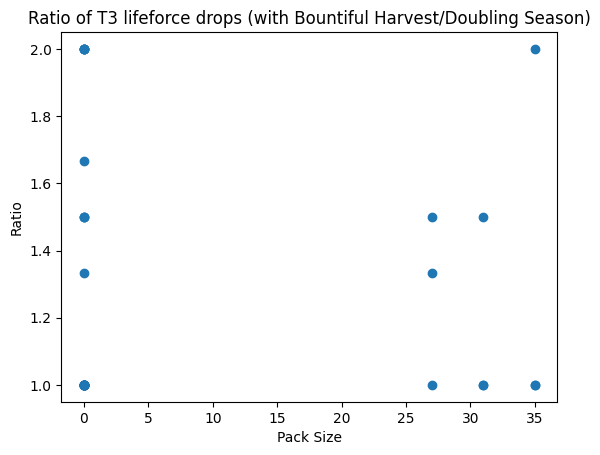

In [46]:
# T3 drops with harvest duplicate lifeforce (not much data on this)

selected_ratios = all_ratios[all_ratios["tier"] == 3]
selected_ratios = selected_ratios[selected_ratios["harvest_additional_monster"] == 10.0]
selected_ratios = selected_ratios[selected_ratios["harvest_duplicate_lifeforce"] == 10.0]

pack_sizes = selected_ratios["pack_size"]
ratios = selected_ratios["ratio"]
regression = scipy.stats.linregress(pack_sizes, ratios)
print("Best fit: ")
print("Drops = {:.5f} * pack_size + {:.5f}".format(regression.slope, regression.intercept))
packsize_range = np.linspace(np.min(pack_sizes), np.max(pack_sizes), 21)

plt.title("Ratio of T3 lifeforce drops (with Bountiful Harvest/Doubling Season)")
plt.xlabel("Pack Size")
plt.ylabel("Ratio")
plt.scatter(selected_ratios["pack_size"], selected_ratios["ratio"])
plt.plot(packsize_range, regression.slope * packsize_range + regression.intercept, linestyle="--", color="r")
plt.show()
plt.close()


# Distribution of Seeds in a Plot

In [47]:
plot_size = 23
plots_83 = combined_plot_data[combined_plot_data["level"] == 83]

def get_seed_counts(plot_dataframe, seed_tier):
    tier_col_name = f"t{seed_tier}"
    tier_amounts = sorted(plot_dataframe[tier_col_name].unique())
    tier_amounts = np.array(range(0, tier_amounts[-1]+1))
    num_plots = []
    for count in tier_amounts:
        # print(tier_dataframe[tier_dataframe["base_amount"] == count].head(3))
        num_plots_for_count = plot_dataframe[plot_dataframe[tier_col_name] == count].shape[0]
        num_plots.append(num_plots_for_count)
    return tier_amounts, np.array(num_plots)


MLE of p: 0.7459003712871287


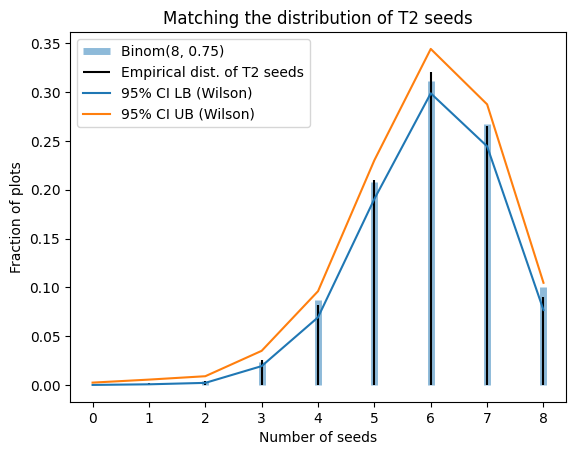

In [59]:
# T2 seed analysis

t2_amounts, t2_counts = get_seed_counts(plots_83, 2)
rv = scipy.stats.binom(8, 0.75)
plt.vlines(t2_amounts, 0, rv.pmf(t2_amounts), lw=5, alpha=0.5, label="Binom(8, 0.75)")
plt.vlines(t2_amounts, 0, t2_counts/np.sum(t2_counts), colors='k', label="Empirical dist. of T2 seeds")
cis = [scipy.stats.binomtest(k=i, n=np.sum(t2_counts)).proportion_ci(method="wilson") for i in t2_counts]
plt.plot(t2_amounts, [ci.low for ci in cis], label="95% CI LB (Wilson)")
plt.plot(t2_amounts, [ci.high for ci in cis], label="95% CI UB (Wilson)")
plt.legend(loc="best")
plt.title("Matching the distribution of T2 seeds")
plt.xlabel("Number of seeds")
plt.ylabel("Fraction of plots")

print("MLE of p:", np.sum(t2_counts * t2_amounts) / (np.sum(t2_counts) * 8))


MLE of p: 0.2506830601092896
MLE of p: 0.40964590964590963


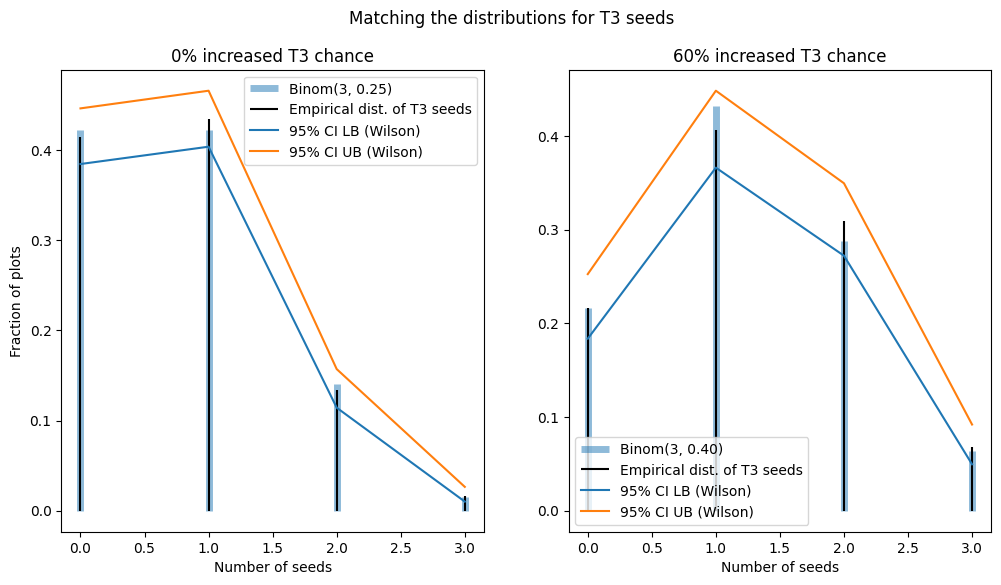

In [49]:
# T3 seed analysis (no increased chance of T3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Matching the distributions for T3 seeds")

selected_plots_83 = plots_83[plots_83["harvest_increased_t3"] == 0]
t3_amounts, t3_counts = get_seed_counts(selected_plots_83, 3)
rv = scipy.stats.binom(3, 0.25)
ax1.vlines(t3_amounts, 0, rv.pmf(t3_amounts), lw=5, alpha=0.5, label="Binom(3, 0.25)")
ax1.vlines(t3_amounts, 0, t3_counts/np.sum(t3_counts), colors='k', label="Empirical dist. of T3 seeds")
cis = [scipy.stats.binomtest(k=i, n=np.sum(t3_counts)).proportion_ci(method="wilson") for i in t3_counts]
ax1.plot(t3_amounts, [ci.low for ci in cis], label="95% CI LB (Wilson)")
ax1.plot(t3_amounts, [ci.high for ci in cis], label="95% CI UB (Wilson)")
ax1.legend(loc="best")
ax1.set_title("0% increased T3 chance")
ax1.set_xlabel("Number of seeds")
ax1.set_ylabel("Fraction of plots")
print("MLE of p:", np.sum(t3_counts * t3_amounts) / (np.sum(t3_counts) * 3))

# T3 seed analysis (with 60% increased chance of T3)

selected_plots_83 = plots_83[plots_83["harvest_increased_t3"] == 60]
t3_amounts, t3_counts = get_seed_counts(selected_plots_83, 3)
rv = scipy.stats.binom(3, 0.4)
ax2.vlines(t3_amounts, 0, rv.pmf(t3_amounts), lw=5, alpha=0.5, label="Binom(3, 0.40)")
ax2.vlines(t3_amounts, 0, t3_counts/np.sum(t3_counts), colors='k', label="Empirical dist. of T3 seeds")
cis = [scipy.stats.binomtest(k=i, n=np.sum(t3_counts)).proportion_ci(method="wilson") for i in t3_counts]
ax2.plot(t3_amounts, [ci.low for ci in cis], label="95% CI LB (Wilson)")
ax2.plot(t3_amounts, [ci.high for ci in cis], label="95% CI UB (Wilson)")
ax2.legend(loc="best")
ax2.set_title("60% increased T3 chance")
ax2.set_xlabel("Number of seeds")
print("MLE of p:", np.sum(t3_counts * t3_amounts) / (np.sum(t3_counts) * 3))



In [50]:
# T4 seed analysis

# Note that the 60% increased chance for T4 and chance not to wilt are both part of the Heart of the Grove atlas notable
selected_plots_83 = plots_83[~plots_83["harvest_t4_wilt"]]
t4_amounts_0, t4_counts_0 = get_seed_counts(selected_plots_83, 4)
ci = scipy.stats.binomtest(k=t4_counts_0[1], n=np.sum(t4_counts_0)).proportion_ci(method="wilson")
print("With 0% increased chance of T4 seeds:")
print("{} seeds out of {} plots".format(t4_counts_0[1], np.sum(t4_counts_0)))
print("Probability of T4 seed: {} to {}".format(ci.low, ci.high))
print()

selected_plots_83 = plots_83[plots_83["harvest_t4_wilt"]]
t4_amounts_60, t4_counts_60 = get_seed_counts(selected_plots_83, 4)
ci = scipy.stats.binomtest(k=t4_counts_60[1], n=np.sum(t4_counts_60)).proportion_ci(method="wilson")
print("With 60% increased chance of T4 seeds:")
print("{} seeds out of {} plots".format(t4_counts_60[1], np.sum(t4_counts_60)))
print("Probability of T4 seed: {} to {}".format(ci.low, ci.high))

With 0% increased chance of T4 seeds:
7 seeds out of 748 plots
Probability of T4 seed: 0.00454040435640224 to 0.019189942795082942

With 60% increased chance of T4 seeds:
8 seeds out of 868 plots
Probability of T4 seed: 0.004677441806755692 to 0.018080662456297927


MLE of p (T2): 0.7673611111111112
MLE of p (T3): 0.1875


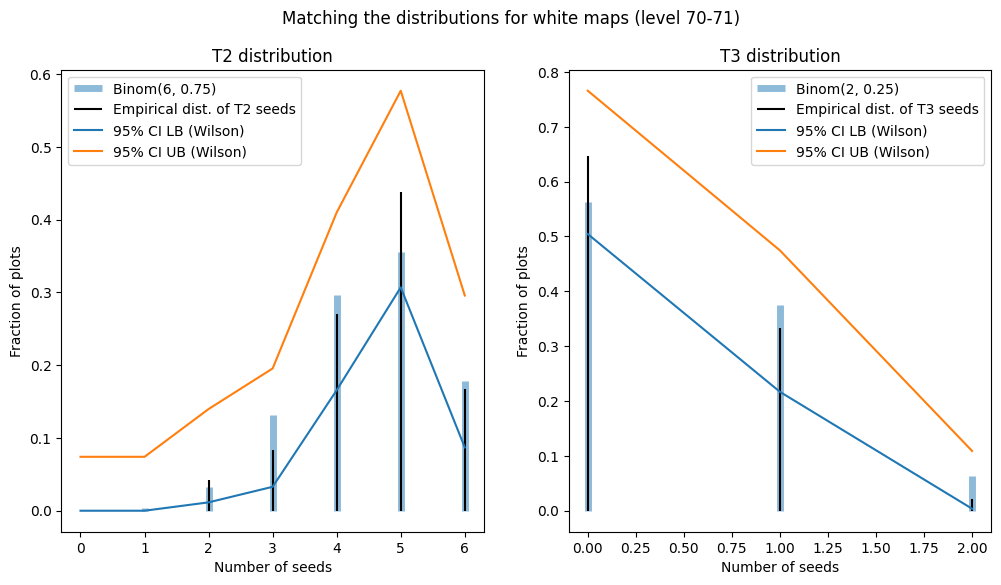

In [51]:
# T2 seed analysis (non-T16 maps)

plots_not_83 = combined_plot_data[combined_plot_data["level"] < 73]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Matching the distributions for white maps (level 70-71)")

t2_amounts, t2_counts = get_seed_counts(plots_not_83, 2)
rv = scipy.stats.binom(6, 0.75)
ax1.vlines(t2_amounts, 0, rv.pmf(t2_amounts), lw=5, alpha=0.5, label="Binom(6, 0.75)")
ax1.vlines(t2_amounts, 0, t2_counts/np.sum(t2_counts), colors='k', label="Empirical dist. of T2 seeds")
cis = [scipy.stats.binomtest(k=i, n=np.sum(t2_counts)).proportion_ci(method="wilson") for i in t2_counts]
ax1.plot(t2_amounts, [ci.low for ci in cis], label="95% CI LB (Wilson)")
ax1.plot(t2_amounts, [ci.high for ci in cis], label="95% CI UB (Wilson)")
ax1.legend(loc="best")
ax1.set_title("T2 distribution")
ax1.set_xlabel("Number of seeds")
ax1.set_ylabel("Fraction of plots")
print("MLE of p (T2):", np.sum(t2_counts * t2_amounts) / (np.sum(t2_counts) * 6))

t3_amounts, t3_counts = get_seed_counts(plots_not_83, 3)
rv = scipy.stats.binom(2, 0.25)
ax2.vlines(t3_amounts, 0, rv.pmf(t3_amounts), lw=5, alpha=0.5, label="Binom(2, 0.25)")
ax2.vlines(t3_amounts, 0, t3_counts/np.sum(t3_counts), colors='k', label="Empirical dist. of T3 seeds")
cis = [scipy.stats.binomtest(k=i, n=np.sum(t3_counts)).proportion_ci(method="wilson") for i in t3_counts]
ax2.plot(t3_amounts, [ci.low for ci in cis], label="95% CI LB (Wilson)")
ax2.plot(t3_amounts, [ci.high for ci in cis], label="95% CI UB (Wilson)")
ax2.legend(loc="best")
ax2.set_title("T3 distribution")
ax2.set_xlabel("Number of seeds")
ax2.set_ylabel("Fraction of plots")
print("MLE of p (T3):", np.sum(t3_counts * t3_amounts) / (np.sum(t3_counts) * 2))

# Number and Type of Plots

In [52]:
# How many plots?
plot_data = combined_plot_data

def get_plot_counts(plot_dataframe):
    counts = {}
    for map_seed in plot_dataframe["map_seed"].unique():
        map_plots = len(plot_dataframe[plot_dataframe.map_seed == map_seed])
        counts[map_plots] = counts.get(map_plots, 0) + 1
    return counts

# With 50% chance of extra pair of crops
extra_harvest_plots = plot_data[plot_data["extra_harvest"]]
extra_harvest_counts = get_plot_counts(extra_harvest_plots)
print("Number of plots with an extra harvest")
print(extra_harvest_counts)

# Without 50% chance of extra crops
no_extra_harvest_plots = plot_data[~plot_data["extra_harvest"]]
no_extra_harvest_counts = get_plot_counts(no_extra_harvest_plots)
print("Number of plots without an extra harvest")
print(no_extra_harvest_counts)

Number of plots with an extra harvest
{6: 40, 8: 67, 10: 26}
Number of plots without an extra harvest
{8: 56, 6: 50}


In [53]:
# Types of plots?

plot_types = combined_plot_data[~combined_plot_data["harvest_yellow_sextant"]].groupby("type")["plot"].count()
plot_types

type
primal    435
vivid     413
wild      428
Name: plot, dtype: int64

# Einhar Memory Seed Distribution Stuff (not in blog post)

In [54]:
selected_data_memory = raw_data_memory[["plot", "t2", "t3", "t4", "type", "tier_3_upgrade", "tier_4_upgrade"]]
vivid_memory_plots = selected_data_memory[selected_data_memory["type"] == "Vivid"].groupby("plot", group_keys=False).apply(lambda df: df.sample(1))
primal_memory_plots = selected_data_memory[selected_data_memory["type"] == "Primal"].groupby("plot", group_keys=False).apply(lambda df: df.sample(1))
wild_memory_plots = selected_data_memory[selected_data_memory["type"] == "Wild"].groupby("plot", group_keys=False).apply(lambda df: df.sample(1))
vivid_plus_primal = vivid_memory_plots.merge(primal_memory_plots, on="plot", how="outer", suffixes=("_vivid", "_primal"))
all_memory_plots = vivid_plus_primal.merge(wild_memory_plots, on="plot", how="outer", suffixes=("", "_wild"))
all_memory_plots.sort_values(by="plot", ascending=True, inplace=True)
all_memory_plots.rename(columns={"t2": "t2_wild", "t3": "t3_wild", "t4": "t4_wild", "type": "type_wild"}, inplace=True)
all_memory_plots["tier_3_upgrade"] = all_memory_plots[["tier_3_upgrade", "tier_3_upgrade_vivid", "tier_3_upgrade_primal"]].max(axis=1)
all_memory_plots["tier_4_upgrade"] = all_memory_plots[["tier_4_upgrade", "tier_4_upgrade_vivid", "tier_4_upgrade_primal"]].max(axis=1)
all_memory_plots.drop(columns=["tier_3_upgrade_primal", "tier_3_upgrade_vivid", "tier_4_upgrade_primal", "tier_4_upgrade_vivid"], inplace=True)
all_memory_plots.fillna(0, inplace=True)
all_memory_plots["t2"] = all_memory_plots["t2_vivid"] + all_memory_plots["t2_primal"] + all_memory_plots["t2_wild"]
all_memory_plots["t3"] = all_memory_plots["t3_vivid"] + all_memory_plots["t3_primal"] + all_memory_plots["t3_wild"]
all_memory_plots["t4"] = all_memory_plots["t4_vivid"] + all_memory_plots["t4_primal"] + all_memory_plots["t4_wild"]
all_memory_plots["total_seeds"] = all_memory_plots["t2"] + all_memory_plots["t3"] + all_memory_plots["t4"]

# Note: This exposes two errors in the memory data: plot 98 never had the T3 primal drops recorded and plot 75 mistakenly recorded the number of seeds for at least one type.
all_memory_plots["plot"].groupby(all_memory_plots.total_seeds).nunique()


total_seeds
44.0     2
45.0    22
46.0    22
47.0    62
Name: plot, dtype: int64

In [55]:
for upgrade_chance in np.arange(0.10, 0.131, 0.01):
    relevant_plots = all_memory_plots[all_memory_plots["tier_3_upgrade"] == upgrade_chance]
    total_seeds = int(relevant_plots["total_seeds"].sum())
    total_t2 = int(relevant_plots["t2"].sum())
    total_t3 = int(relevant_plots["t3"].sum())
    total_t4 = int(relevant_plots["t4"].sum())
    t2_ci = scipy.stats.binomtest(k=total_t2, n=total_seeds).proportion_ci(method="wilson")
    t3_ci = scipy.stats.binomtest(k=total_t3, n=total_seeds).proportion_ci(method="wilson")
    t4_ci = scipy.stats.binomtest(k=total_t4, n=total_seeds).proportion_ci(method="wilson")
    t3_t4_ci = scipy.stats.binomtest(k=total_t3 + total_t4, n=total_seeds).proportion_ci(method="wilson")
    print("T3 upgrade chance: ", upgrade_chance)
    print("Mean T2: ", relevant_plots["t2"].mean())
    print("Mean T3: ", relevant_plots["t3"].mean())
    print("Mean T4: ", relevant_plots["t4"].mean())
    print("T2 fraction: {} ({} to {})".format(total_t2/total_seeds, t2_ci.low, t2_ci.high))
    print("T3 fraction: {} ({} to {})".format(total_t3/total_seeds, t3_ci.low, t3_ci.high))
    print("T4 fraction: {} ({} to {})".format(total_t4/total_seeds, t4_ci.low, t4_ci.high))
    print("T3 + T4 fraction: {} ({} to {})".format((total_t3 + total_t4)/total_seeds, t3_t4_ci.low, t3_t4_ci.high))
    print("T4 / (T3 + T4): ", total_t4 / (total_t3 + total_t4))


T3 upgrade chance:  0.1
Mean T2:  40.958333333333336
Mean T3:  5.0
Mean T4:  0.25
T2 fraction: 0.8863841298467088 (0.866357730779548 to 0.9037429814173037)
T3 fraction: 0.10820559062218214 (0.09125691495755142 to 0.1278591656736456)
T4 fraction: 0.005410279531109108 (0.0024818682176351702 to 0.011753276146488105)
T3 + T4 fraction: 0.11361587015329125 (0.09625701858269634 to 0.13364226922045194)
T4 / (T3 + T4):  0.047619047619047616
T3 upgrade chance:  0.11
Mean T2:  40.5
Mean T3:  5.791666666666667
Mean T4:  0.125
T2 fraction: 0.8725314183123878 (0.8516591940547198 to 0.8908432363665293)
T3 fraction: 0.12477558348294435 (0.10664981553860059 to 0.14548026659132207)
T4 fraction: 0.0026929982046678637 (0.0009162758686314617 to 0.007887708581074597)
T3 + T4 fraction: 0.12746858168761221 (0.10915676363347077 to 0.1483408059452802)
T4 / (T3 + T4):  0.02112676056338028
T3 upgrade chance:  0.12
Mean T2:  39.9
Mean T3:  6.133333333333334
Mean T4:  0.26666666666666666
T2 fraction: 0.861771058315

<Axes: >

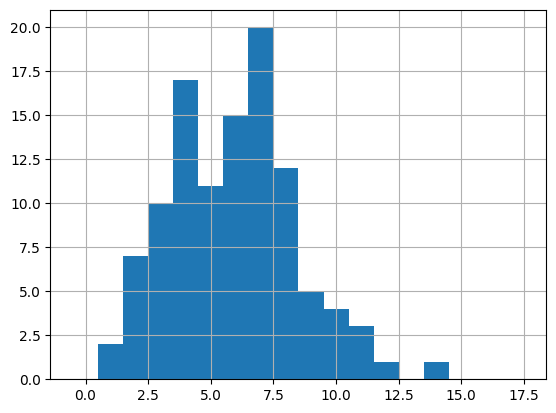

In [56]:
all_memory_plots["t3"].hist(bins=np.arange(-0.5, 18.5, 1))

# Sacred Blossoms

In [57]:
sacred_319 = raw_data_319[raw_data_319["type_y"] == "sacred"]
sacred_320 = raw_data_320[raw_data_320["type_y"] == "sacred"]
all_sacred = pd.concat([sacred_319, sacred_320])
all_t4_seeds = len(combined_plot_data[combined_plot_data["t4"] != 0])
print("Number of sacred blossom drops in maps: ", len(all_sacred))
print("Number of T4 seeds in maps: ", all_t4_seeds)

Number of sacred blossom drops in maps:  1
Number of T4 seeds in maps:  16


In [58]:
memory_t4_seeds = all_memory_plots["t4"].sum()
memory_t4_blossoms = raw_data_memory["sacred drops"].sum()
print("Number of sacred blossom drops in memories: ", memory_t4_blossoms)
print("Number of T4 seeds in memories: ", memory_t4_seeds)

Number of sacred blossom drops in memories:  4.0
Number of T4 seeds in memories:  25.0
